In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from wotan import flatten
from wotan import transit_mask

from astropy.io import fits
from astropy.wcs import WCS

%matplotlib widget

In [2]:
sector49_tpf = '../TESS/sector49_tp.fits'
sector49_lcf = '../TESS/sector49_lc.fits'

sector50_tpf = '../TESS/sector50_tp.fits'
sector50_lcf = '../TESS/sector50_lc.fits'

sector76_tpf = '../TESS/sector76_tp.fits'
sector76_lcf = '../TESS/sector76_lc.fits'

lcf49_hdu = fits.open(sector49_lcf)
lcf50_hdu = fits.open(sector50_lcf)
lcf76_hdu = fits.open(sector76_lcf)

In [3]:
from TESS_LC_Class import Selection
from TESS_LC_Class import Filtering

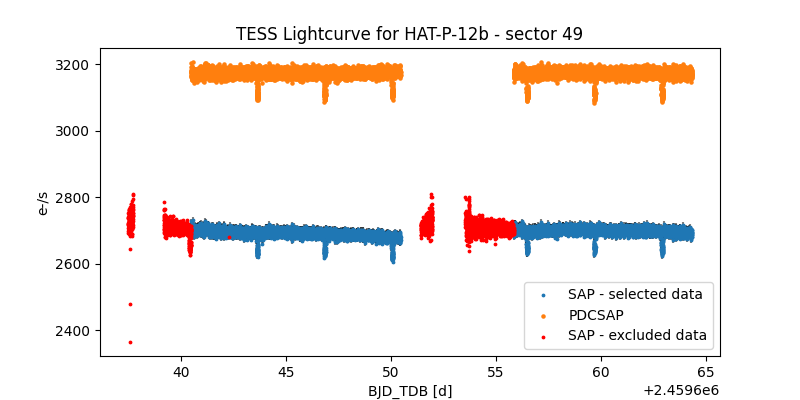

In [4]:
selection_s49 = Selection(lcf49_hdu, 49)

plt.figure(figsize=(8, 4))
sector49_dictionary = selection_s49.selection()

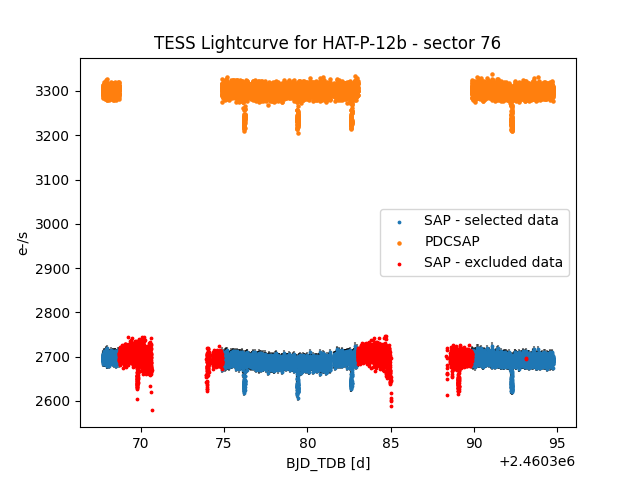

In [5]:
selection_s76 = Selection(lcf76_hdu, 76)

plt.figure()
sector76_dictionary = selection_s76.selection()

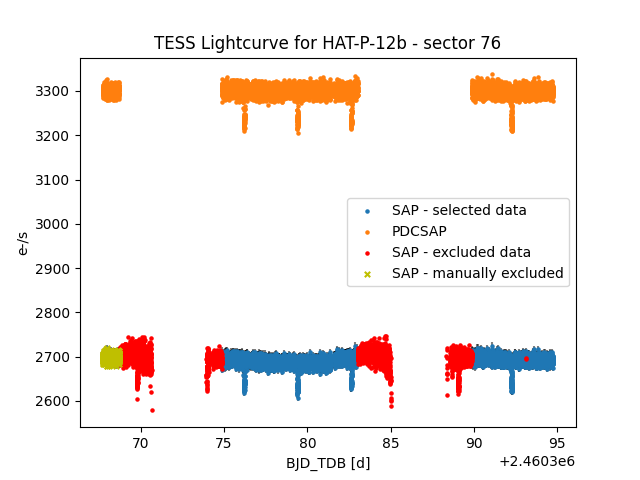

In [6]:
plt.figure()
sector76_dictionary = selection_s76.manual_selection(2460369.0)

In [7]:
sector76_hspline = Filtering()
sector76_hspline.filtering(sector76_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2)
print()
sector76_bw = Filtering()
sector76_bw.filtering(sector76_dictionary, window=1., break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error (SAP) =  0.002643
STD with mask (SAP) =  0.002646
STD without mask (SAP) =  0.002656
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002643
STD with mask (PDCSAP) =  0.002646
STD without mask (PDCSAP) =  0.002656

This is worth, give it a look!
Median flux error (SAP) =  0.002643
STD with mask (SAP) =  0.002648
STD without mask (SAP) =  0.002647
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002643
STD with mask (PDCSAP) =  0.002648
STD without mask (PDCSAP) =  0.002647


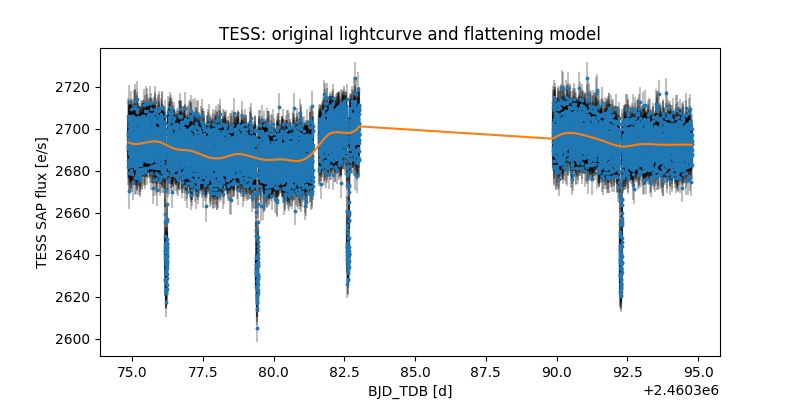

In [8]:
plt.figure(figsize=(8, 4))

mask = sector76_hspline.mask

sector76_hspline.make_plot_model(pdc=False)

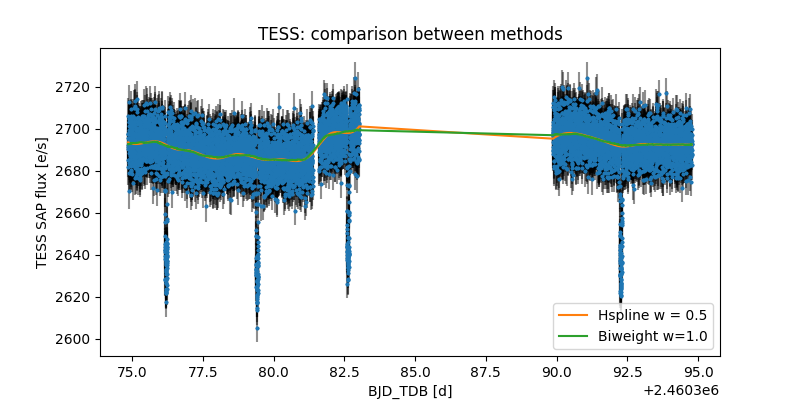

In [9]:
plt.figure(figsize=(8, 4))

sector76_hspline.make_plot_comparison_methods(False, 'Hspline w = 0.5', 'C1')
sector76_bw.make_plot_comparison_methods(False, 'Biweight w=1.0', 'C2')

plt.show()

In [10]:
sector49_hspline = Filtering()
sector49_hspline.filtering(sector49_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2)
print()
sector49_bw = Filtering()
sector49_bw.filtering(sector49_dictionary, window=1, break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error (SAP) =  0.002733
STD with mask (SAP) =  0.002666
STD without mask (SAP) =  0.002679
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002733
STD with mask (PDCSAP) =  0.002666
STD without mask (PDCSAP) =  0.002679

This is worth, give it a look!
Median flux error (SAP) =  0.002733
STD with mask (SAP) =  0.002672
STD without mask (SAP) =  0.002673
##########################################
This is worth, give it a look!
Median flux error (PDCSAP) =  0.002733
STD with mask (PDCSAP) =  0.002672
STD without mask (PDCSAP) =  0.002673


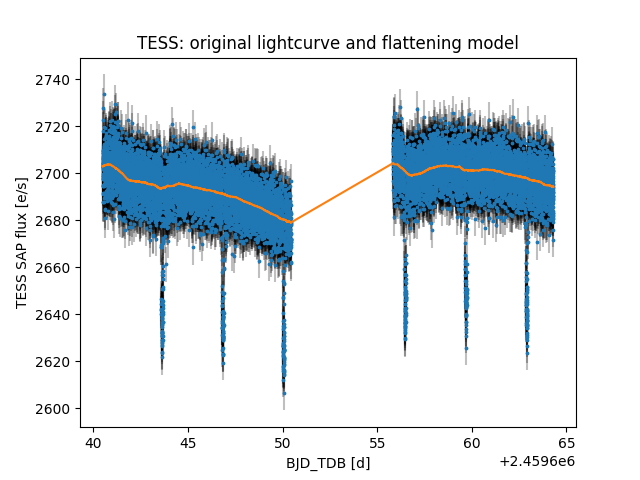

In [11]:
plt.figure()
sector49_bw.make_plot_model(pdc=False)

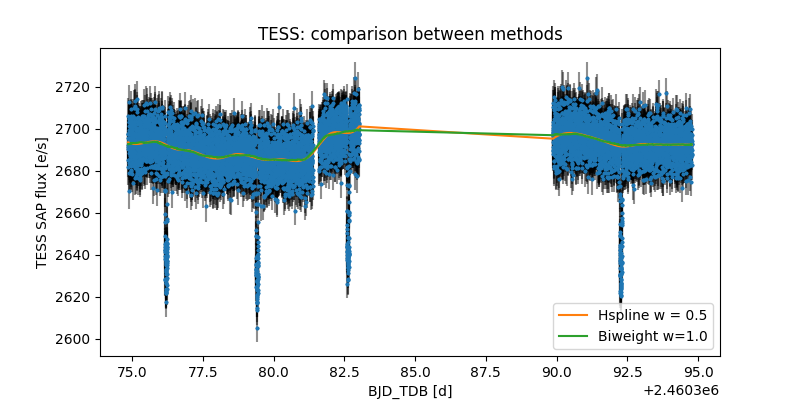

In [12]:
plt.figure(figsize=(8, 4))

sector76_hspline.make_plot_comparison_methods(False, 'Hspline w = 0.5', 'C1')
sector76_bw.make_plot_comparison_methods(False, 'Biweight w=1.0', 'C2')

plt.show()

In [13]:
sector49_dictionary_hs = {
    'time': sector49_hspline.time,
    'flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector49_hspline.pdcsap_flux_flatten_masked/sector49_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector49_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector49_hspline.sap_flux_err/sector49_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector49_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector49_bw.sap_flux_flatten_masked/sector49_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector49_hspline.pdcsap_flux_err/sector49_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector49_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector49_bw.pdcsap_flux_err/sector49_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector49_dictionary_hs, open('../Results/TESS/sector49_flatten.p','wb'))

In [14]:
sector76_dictionary_hs = {
    'time': sector76_hspline.time,
    'flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector76_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector76_hspline.sap_flux_err/sector76_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector76_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector76_bw.sap_flux_flatten_masked/sector76_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector76_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector76_hspline.pdcsap_flux_err/sector76_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector76_dictionary_hs, open('../Results/TESS/sector76_flatten.p','wb'))